# 문제 1번

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
from sklearn.metrics import r2_score

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()

In [7]:
X = boston.data
y = boston.target

In [8]:
X.shape, y.shape

((506, 13), (506,))

In [9]:
lin_reg = LinearRegression()
ridge = Ridge(alpha = 0.3)
lasso = Lasso(alpha = 0.3)

## Linear

In [10]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
lin_reg.coef_ # coef

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [18]:
lin_reg.intercept_ # bias

36.459488385090125

In [15]:
r2_score(y, lin_reg.predict(X)) # r2

0.7406426641094095

##Ridge

In [25]:
ridge.fit( X, y)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [26]:
ridge.coef_

array([-1.06578901e-01,  4.68290433e-02,  8.37344938e-03,  2.63955153e+00,
       -1.48730586e+01,  3.83132710e+00, -1.86901001e-03, -1.43294124e+00,
        2.99315342e-01, -1.25665908e-02, -9.20757737e-01,  9.46225053e-03,
       -5.28060996e-01])

In [27]:
ridge.intercept_

34.419305669531276

In [28]:
r2_score(y, ridge.predict(X))

0.7403394824615863

##LASSO

In [31]:
lasso.fit(X,y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
lasso.coef_

array([-9.14610285e-02,  4.97437034e-02, -1.78294286e-02,  0.00000000e+00,
       -0.00000000e+00,  3.09582788e+00, -9.62695589e-04, -1.04048026e+00,
        2.80509082e-01, -1.52769948e-02, -7.72002200e-01,  9.91289534e-03,
       -6.16817817e-01])

In [33]:
lasso.intercept_

29.12974984869434

In [34]:
r2_score(y, lasso.predict(X))

0.7206350048380019

# 문제 2번

 - sklearn의 load_boston 을 이용해서 boston 데이터를 로드하고, sklearn에서 RandomForest를 최대 트리의 깊이를 2로 하고, estimator는 100개로 설정하여 수행하시오. 그리고 mean_squared_error를 출력하시오. 그리고 각 feature 들의 중요도를 출력하십시요.

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
randf = RandomForestRegressor(n_estimators=100, max_depth= 2)

In [39]:
randf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y, randf.predict(X))

20.056931721006755

In [41]:
print(randf.feature_importances_)

[0.00204244 0.         0.         0.         0.00197394 0.52391704
 0.         0.00572649 0.         0.         0.         0.
 0.46634008]


# 3번

- Tensorflow를 사용해 Mnist 데이터를 분류하고 그 결과를 출력하시요. 어떤 알고리즘, 어떤 모델이든 상관 없습니다.

In [179]:
import tensorflow as tf

(X_train, y_train),(X_test, y_test)  = tf.keras.datasets.mnist.load_data()

In [180]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [181]:
X_train.min() , X_train.max() # all same

(0, 255)

In [182]:
# scaling

In [183]:
X_train_ = X_train[..., tf.newaxis] / 255
X_test_ = X_test[..., tf.newaxis] / 255

In [184]:
y_train_ = y_train.reshape(-1,1)
y_test_ = y_test.reshape(-1,1)

In [185]:
X_train_.shape, X_test_.shape , y_train_.shape, y_test_.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 1), (10000, 1))

In [141]:
from tensorflow.keras import models, layers

In [186]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [187]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [188]:
model.fit(X_train_, y_train_, epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1651 - accuracy: 0.9490
Epoch 2/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0545 - accuracy: 0.9829
Epoch 3/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0396 - accuracy: 0.9878


In [189]:
test_loss, test_acc = model.evaluate(X_test_, y_test_, verbose=2) # 거의 완벽스~

313/313 - 3s - loss: 0.0274 - accuracy: 0.9910


# 4번

- Yena 시계열 예측을 하시오.
시계열 예측시 10개의 데이터셋으로 다음 1개를 예측하도록 하시오.

train_set과 test_set으로 각각 나눠, 예측하되 예측이 끝난 후, ploting을 하시오.

mse가 평가 지표로 사용되며, y_train std의 10% 아래로 나오도록 학습하십시요.

그리고 test에 대한 mse를 측정하고 출력하십시요.

이 때 예측시에는 온도(T (degC))로만 컬럼을 사용하고, 예측 타겟도 온도로 하시오.

In [112]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip #데이터셋 다운로드
!unzip jena_climate_2009_2016.csv.zip #데이터셋 압축풀기

--2020-07-09 07:18:31--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.100.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.100.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  42.5MB/s    in 0.3s    

2020-07-09 07:18:31 (42.5 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [191]:
import pandas as pd
Data = pd.read_csv('jena_climate_2009_2016.csv') #데이터셋 불러오기
Data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [192]:
data = Data.iloc[:, 2]

In [193]:
type(data)

pandas.core.series.Series

In [194]:
data

0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420546   -4.05
420547   -3.35
420548   -3.16
420549   -4.23
420550   -4.82
Name: T (degC), Length: 420551, dtype: float64

In [195]:
X = []
y = []


for i in range(len(data)-batch_size):
    X.append(data[i:i+10])
    y.append(data[i+10])

In [196]:
X = np.array(X)
y = np.array(y)

In [150]:
X.shape, y.shape

((420541, 10), (420541,))

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [199]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((336432, 10), (84109, 10), (336432,), (84109,))

In [201]:
# scaling
mean = X_train.mean()
std = X_train.std()

mean, std

(8.98774954819994, 8.440489468553181)

In [156]:
x_train = (X_train - mean)/std
x_test = (X_test - mean)/std

In [157]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((336432, 10), (84109, 10), (336432,), (84109,))

In [158]:
x_train =x_train.reshape(-1,10,1)
x_test = x_test.reshape(-1,10,1) 
y_train= y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [159]:
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((336432, 10, 1), (84109, 10, 1), (336432, 1), (84109, 1))

In [160]:
# 시계열이므로, LSTM 사용할거야

model1 = models.Sequential()
model1.add(layers.LSTM(10 , return_sequences=True))
model1.add(layers.LSTM(10, return_sequences=True))
model1.add(layers.LSTM(5))
model1.add(layers.Dense(1))

In [161]:
model1.compile(
    optimizer='adam',
    loss = 'mse'
)

In [162]:
model1.fit(x_train, y_train, epochs = 5)

Epoch 1/5
10514/10514 [==============================] - 134s 13ms/step - loss: 11.7157
Epoch 2/5
10514/10514 [==============================] - 133s 13ms/step - loss: 0.0691
Epoch 3/5
10514/10514 [==============================] - 135s 13ms/step - loss: 0.0486
Epoch 4/5
10514/10514 [==============================] - 134s 13ms/step - loss: 0.0467
Epoch 5/5
10514/10514 [==============================] - 137s 13ms/step - loss: 0.0461


In [ ]:
model1.

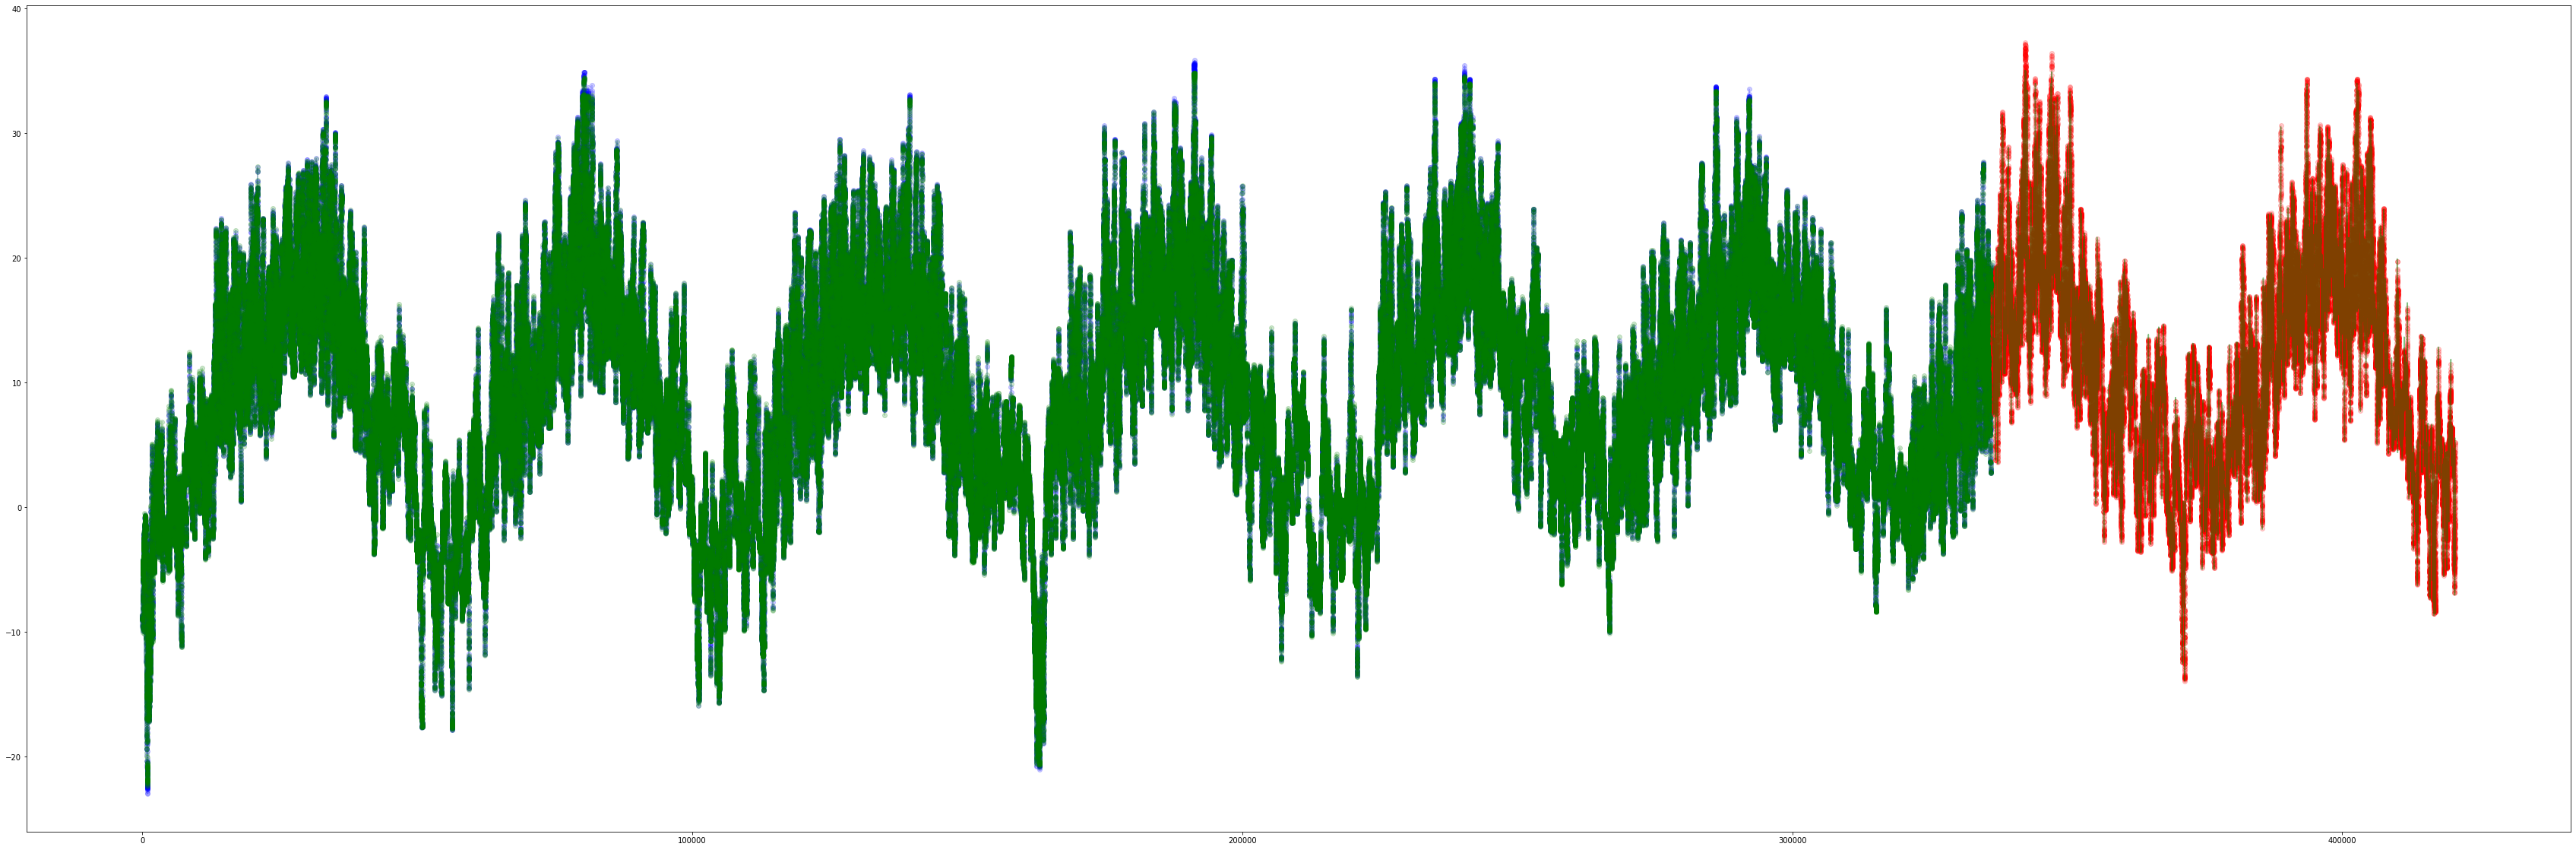

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize = (60,20))
label1 = np.arange(x_train.shape[0])
label2 = np.arange(x_train.shape[0],  x_train.shape[0] + x_test.shape[0])
plt.plot(label1, y_train, '-o', c='b', alpha = 0.2)
plt.plot(label1, model1.predict(x_train), '-o', c='g', alpha = 0.2)
plt.plot(label2, y_test, '-o', c='r',  alpha = 0.2)
plt.plot(label2, model1.predict(x_test), c = 'g', alpha = 0.5)
plt.show()

In [178]:
mean_squared_error(y_train, model1.predict(x_train))

0.04278423738568445

In [200]:
y_train.std()*0.1 # 이거보단 loss가 훨씬 낮음../

0.8440282269614588

## test에 대한 mse

In [174]:
mean_squared_error(y_test, model1.predict(x_test)) # 매우 낮은걸 볼 수 있다.

0.04716522026701085

In [175]:
print(mean_squared_error(y_test, model1.predict(x_test)) )

0.04716522026701085
